# Analysis Code
CRK97

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit,fmin

In [2]:
## Import Data

In [11]:
# Make a list of lines on .spe files to be ignored
skip=[0,1,2,3,4,5,6,7,8,9,10,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]

# Useful helper functions
## Reads multiple files
def read_multi_csv(path):             
    file = 'https://gitlab.com/QPCKAC/sr-lab/-/tree/main'+path+'.SPE'  
    file = file.replace(" ", "%20")
    #print (file)         
    df = pd.read_csv(file, skiprows=skip, header=0, names=["Data"])         
    dfs.append(df) 
    return dfs

## Function to fix spaces in urls
def url(path):
    path = 'https://gitlab.com/QPCKAC/sr-lab/-/tree/main/4-11-23'+path
    path = path.replace(" ", "%20")
    return path

In [13]:
# Read spectrum files (.spe) as .csv with pandas

## Number of samples to average through 
endnumber = 0

## Readings
### Background
#BgFiles = read_multi_csv(0,endnumber,"/4-11-23/Background-000")    #Read files
#Bg = aver(BgFiles)    #Average
Bg=0
## Barium (Ba133)
Ba133Files = read_multi_csv("/4-11-23/Ba133-000")    #Read files
Ba133 = Ba133Files - Bg    #Average & subtract Bg

## Cadmium (Cd109)
Cd109Files = read_multi_csv("/4-11-23/Cd109-000")    #Read files
Cd109 = Cd109Files - Bg     #Average & subtract Bg

## Cobalt (Co57)
Co57Files = read_multi_csv("/4-11-23/Co57-000")    #Read files
Co57 = Co57Files - Bg     #Average & subtract Bg

## Cobalt (Co60)
Co60Files = read_multi_csv("/4-11-23/Co60-000")    #Read files
Co60 = Co60Files - Bg     #Average & subtract Bg

## Cesium (Cs137)
Cs137Files = read_multi_csv("/4-11-23/Cs137-000")    #Read files
Cs137 = Cs137Files - Bg     #Average & subtract Bg

## Manganese (Mn54)
Mn54Files = read_multi_csv("/4-11-23/Mn54-000")    #Read files
Mn54 = Mn54Files - Bg     #Average & subtract Bg

## Sodium (Na22)
Na22Files = read_multi_csv("/4-11-23/Na22-000")    #Read files
Na22 = Na22Files - Bg     #Average & subtract Bg



ParserError: Error tokenizing data. C error: Expected 1 fields in line 24, saw 2


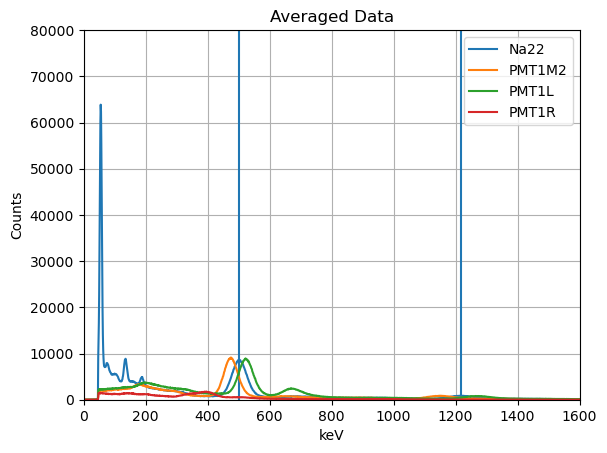

In [5]:
 #Plot Amplification Comparison
Bin = 1 # Bin size from calibration on Maestro
x = np.arange(0,2048,Bin)[0:len(Bg)]

fig, ax = plt.subplots()
#ax.plot(x, Bg, label="Bg")
#ax.plot(x,Ba133, label="Ba133"); ax.axvline(383) ;# ax.axvline(355) 
#ax.plot(x,Cd109, label="Cd109");ax.axvline(97) ;# ax.axvline(88) 
#ax.plot(x,Co57, label="Co57"); ax.axvline(130);# ax.axvline(122) 
#ax.plot(x,Co60, label="Co60"); ax.axvline(1095); ax.axvline(1230);# ax.axvline(1173); ax.axvline(1332)
#ax.plot(x,Cs137, label="Cs137"); ax.axvline(674);# ax.axvline(661.2) 
#ax.plot(x,Mn54, label="Mn54");# ax.axvline(806);# ax.axvline(835)  
ax.plot(x,Na22, label="Na22"); ax.axvline(502); ax.axvline(1217);# ax.axvline(511); ax.axvline(1274)
#ax.plot(x,PMT1M1, label="PMT1M1");# ax.axvline(511); ax.axvline(1274) 
ax.plot(x,PMT1M2, label="PMT1M2");# ax.axvline(511); ax.axvline(1274) 
ax.plot(x,PMT1L, label="PMT1L");# ax.axvline(511); ax.axvline(1274) 
ax.plot(x,PMT1R, label="PMT1R");# ax.axvline(511); ax.axvline(1274) 

#plt.xlim(0,Bin*len(Bg))

plt.xlim(0,1600)
plt.ylim(0,80000)

ax.set(xlabel='keV', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()


#Mamp for PMT1
#Lamp for PMT2


In [6]:
def Energy(E, theta):
    return E/(1 + E/0.511*(1-np.cos(theta*np.pi/180)))